In [2]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [3]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.13.1


In [6]:
# Import other libraries
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from DataLoader import load_data

In [12]:
(X_train, y_train), (X_test, y_test), (X_val, y_val) = load_data()
X_train = X_train / 255.0
X_train.shape

(3328, 96, 96, 3)

In [13]:
num_img = 10

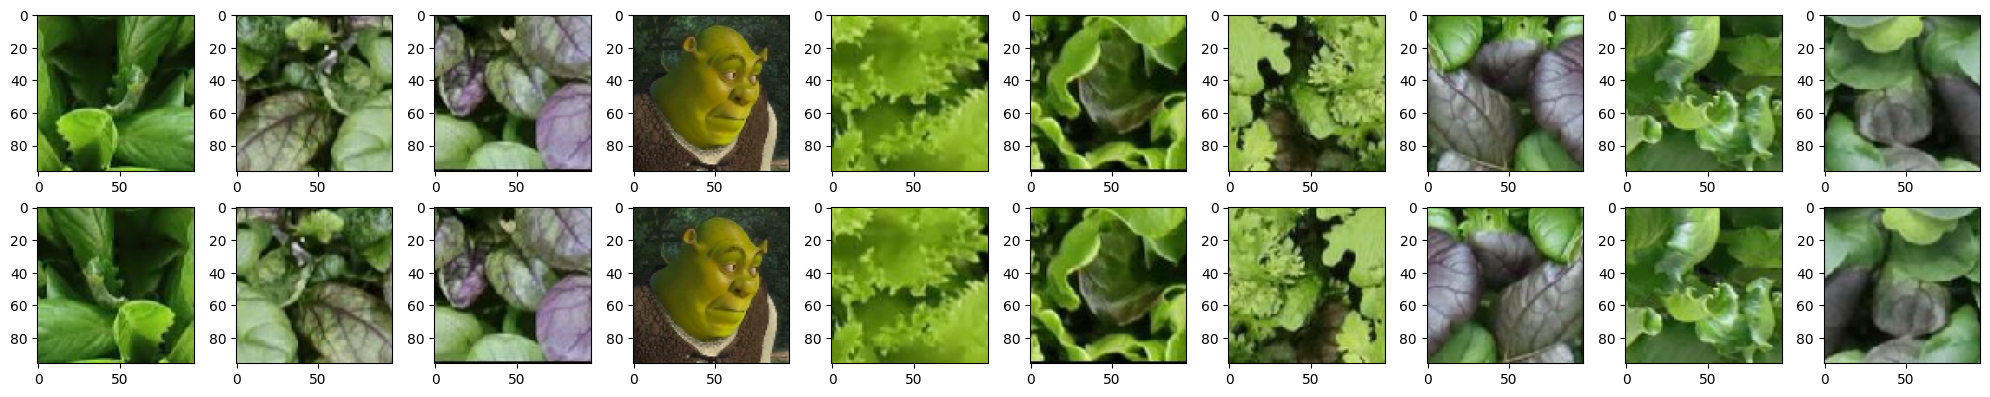

In [15]:
flip = tf.keras.Sequential([
  tfkl.RandomFlip("horizontal"),
])

X_train_flip = flip(X_train)

fig, axes = plt.subplots(2, num_img, figsize=(20,4))
for i in range(num_img):
    ax = axes[0,i%num_img]
    ax.imshow(X_train[i])
    ax = axes[1,i%num_img]
    ax.imshow(X_train_flip[i])
plt.tight_layout()
plt.show()

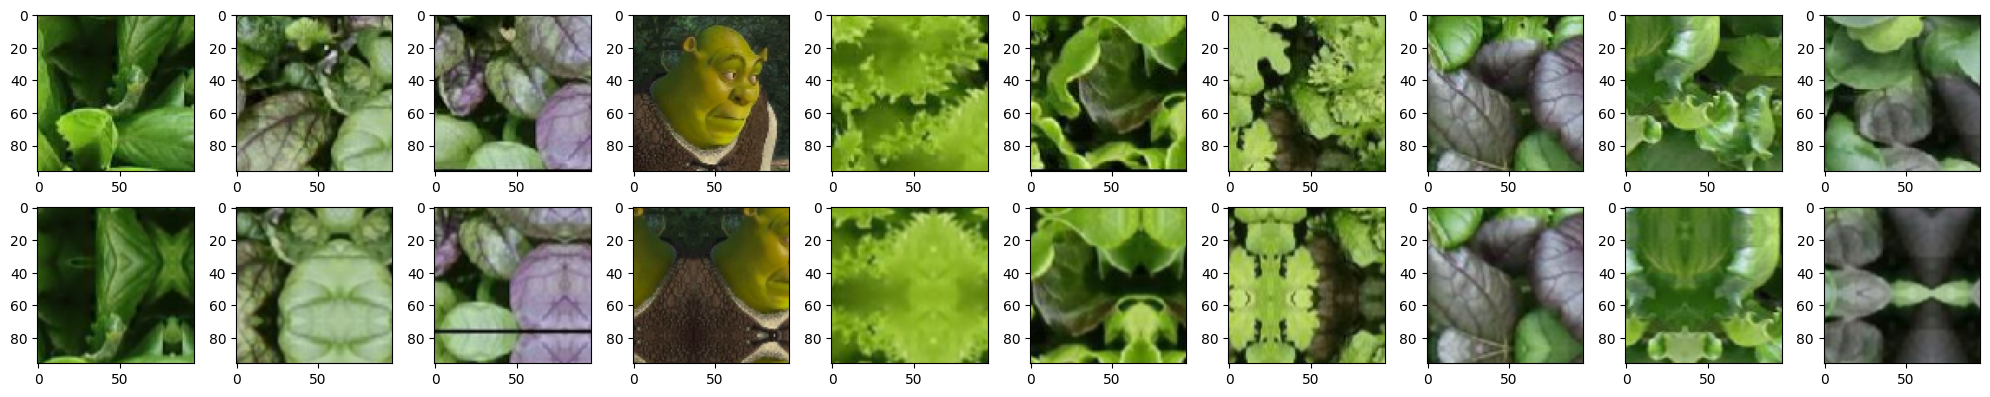

In [17]:
translation = tf.keras.Sequential([
  tfkl.RandomTranslation(0.2,0.2),
])

X_train_translation = translation(X_train)

fig, axes = plt.subplots(2, num_img, figsize=(20,4))
for i in range(num_img):
    ax = axes[0,i%num_img]
    ax.imshow(X_train[i])
    ax = axes[1,i%num_img]
    ax.imshow(X_train_translation[i])
plt.tight_layout()
plt.show()

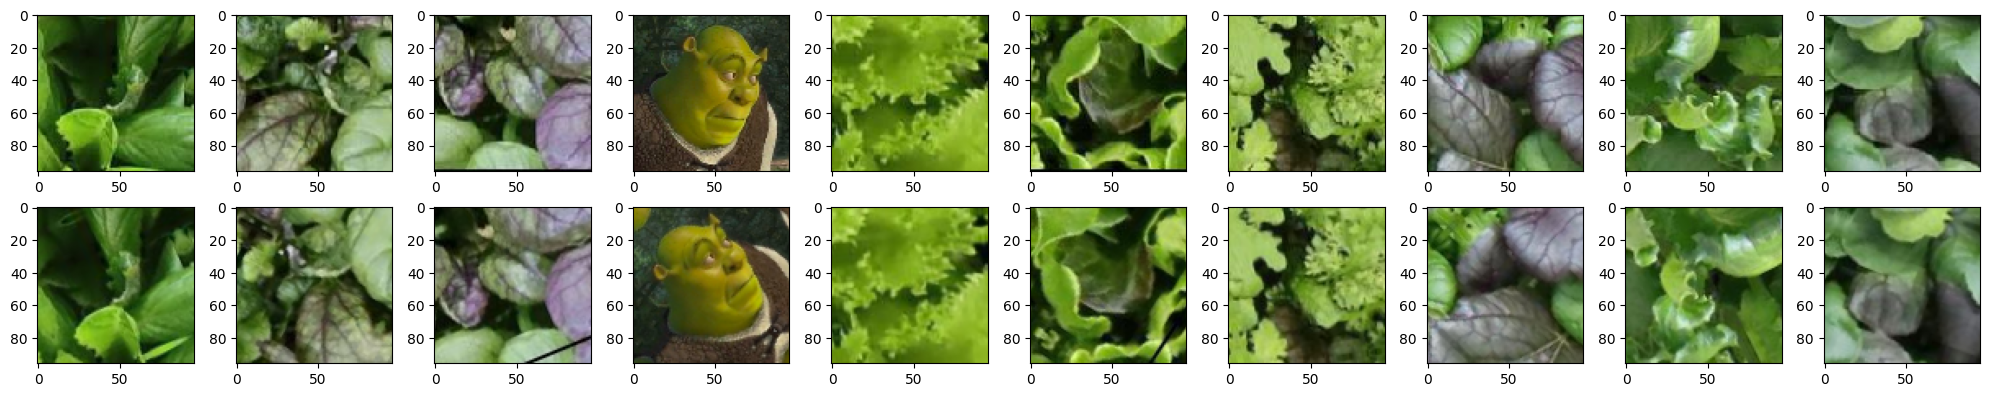

In [18]:
rotation = tf.keras.Sequential([
  tfkl.RandomRotation(0.2),
])

X_train_rotation = rotation(X_train)

fig, axes = plt.subplots(2, num_img, figsize=(20,4))
for i in range(num_img):
    ax = axes[0,i%num_img]
    ax.imshow(X_train[i])
    ax = axes[1,i%num_img]
    ax.imshow(X_train_rotation[i])
plt.tight_layout()
plt.show()

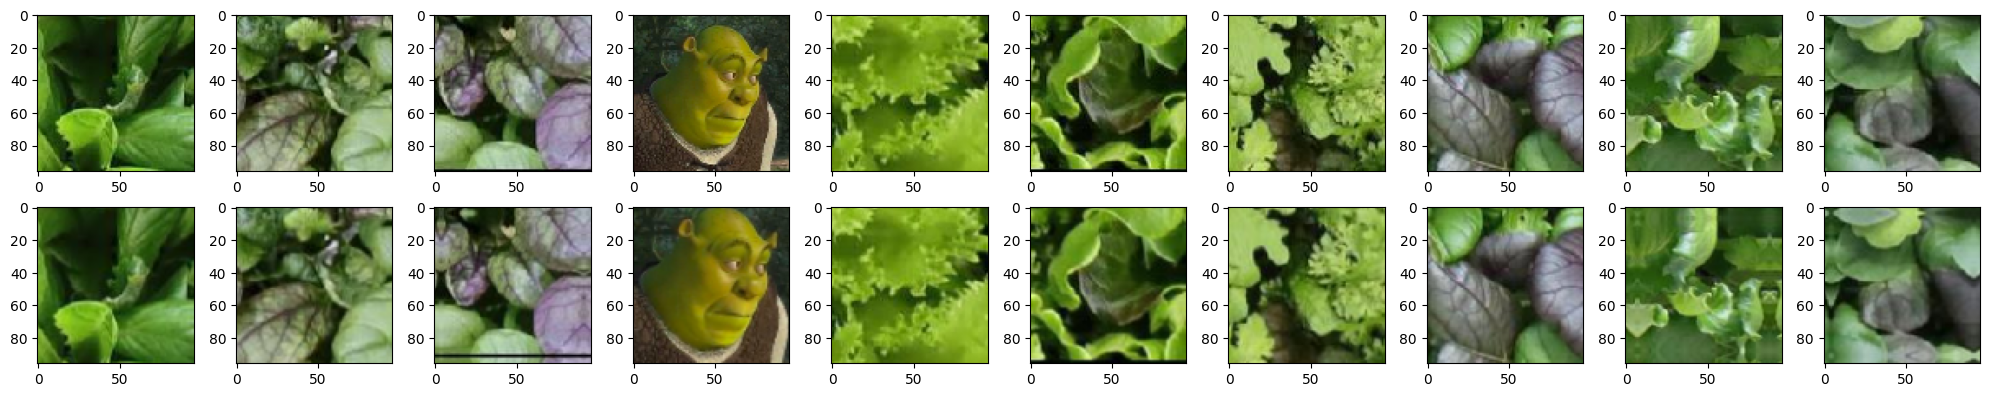

In [19]:
zoom = tf.keras.Sequential([
  tfkl.RandomZoom(0.2),
])

X_train_zoom = zoom(X_train)

fig, axes = plt.subplots(2, num_img, figsize=(20,4))
for i in range(num_img):
    ax = axes[0,i%num_img]
    ax.imshow(X_train[i])
    ax = axes[1,i%num_img]
    ax.imshow(X_train_zoom[i])
plt.tight_layout()
plt.show()

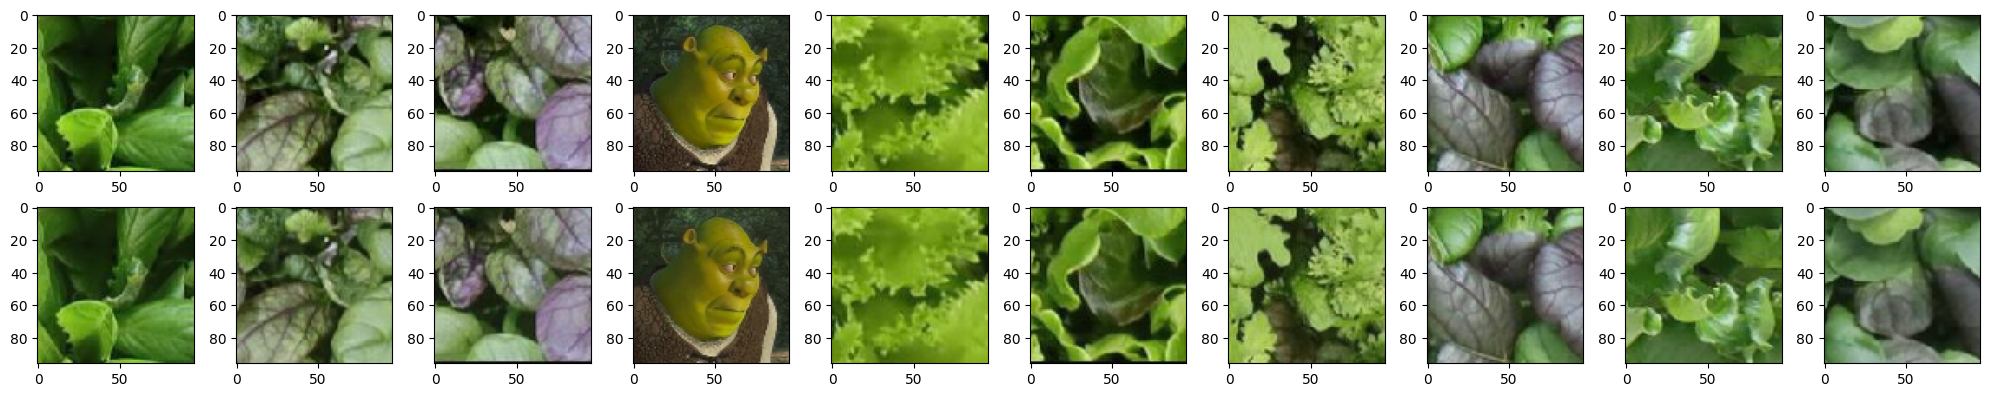

In [20]:
contrast = tf.keras.Sequential([
  tfkl.RandomContrast(0.75),
])

X_train_contrast = contrast(X_train)

fig, axes = plt.subplots(2, num_img, figsize=(20,4))
for i in range(num_img):
    ax = axes[0,i%num_img]
    ax.imshow(X_train[i])
    ax = axes[1,i%num_img]
    ax.imshow(np.clip(X_train_contrast[i], 0, 1))
plt.tight_layout()
plt.show()